# Installation des packages

In [1]:
!pip3 install openpyxl
!pip3 install linearmodels
import pandas as pd
import numpy as np
import linearmodels
from linearmodels.iv import IV2SLS

# Importation des données

## Notes ESG : environnement

In [2]:
esg_data = pd.read_csv('ESG_E.csv')
esg_data.head()

/tmp/ipykernel_10111/1757238243.py:1: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  esg_data = pd.read_csv('ESG_E.csv')


,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,"44,375","44,08888889","44,08627778","44,08371889","44,08121118","44,07875362","44,07634522","43,7962072","44,21611639",...,"60,4206142","57,30323449","56,92830124","56,94691093","57,36955728","56,37531796","55,29196737","55,42993636","55,71251352","56,08985466"
1,2,"40,90277778","40,63055556","40,64155556","40,65233556","40,66289996","40,67325307","40,40562134","40,42112002","40,43630873",...,"73,44261856","73,25716506","72,94483216","72,55042001","73,64794086","74,07164631","74,00185758","74,20052537","74,09938254","74,07640744"
2,3,"49,51388889","49,51388889","49,51388889","49,51388889","49,51388889","50,06944444","50,05833333","50,04744444","50,31455111",...,"74,65986533","74,65596497","74,96295978","75,13466786","75,37141777","75,02208314","75,16479506","75,54714096","75,36927013","75,09739596"
3,4,"38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889","38,57638889",...,"60,55539706","60,67762245","60,51962556","60,3647886","60,49082616","62,00323186","62,37427834","62,73790388","62,81647914","62,61570511"
4,5,"37,91666667","38,20833333","35,43861111","35,50206111","36,39757544","34,77517949","34,01856479","32,16597127","32,29487407",...,"53,46184228","53,79463351","53,77218636","53,82112083","54,07152963","54,23695602","55,12772167","55,16972037","54,98915515","54,85916779"


## Score de réputation environnemental

A historical erosion factor is applied to the quantities of news articles, with recent articles weighing more than older ones. We don’t want companies scoring high to rest on their laurels and we want laggards to have a chance to improve. As a convention, each month, positive and negative articles lose 2% of their value. For example, an article published 10 years ago has lost 90% of its information value (weight)

### PFL_E

Reputation score based on forward-looking news data in the Environment dimension. The reputation score is given by the ratio between positive news and total news.

In [3]:
PFL_E = pd.read_excel('PFL_E.xlsx', engine='openpyxl')
PFL_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,81.186158,81.186158,81.186158,81.186158,81.186158,81.186158,82.956271,78.140388,79.159174,79.159174
1,2,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,...,88.759955,88.759955,83.461146,83.461146,86.316169,87.240609,87.240609,85.286927,85.286927,85.390845
2,3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,91.555642,91.555642,92.008106,92.008106,92.292810,92.781502,93.034577,93.353531,93.700120,93.760769
3,4,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016,58.695016
4,5,92.227424,92.227424,92.227424,92.227424,92.227424,92.227424,93.707863,93.707863,93.707863,...,76.934138,76.934138,77.495928,77.495928,77.865949,79.341179,79.351232,76.901246,75.316849,75.173441


### Diff_z_E

Diff_z_E represents the gap between backward-looking and forward-looking reputation scores and allows to formulate the greenwashing risk indicator.

In [4]:
Diff_z_E = pd.read_excel('diff_z_E.xlsx', engine='openpyxl')
Diff_z_E.head()

,Unnamed: 0,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0,1,5.475597,5.339223,5.534291,5.639993,5.892612,5.697990,5.272556,5.014469,...,1.131895,1.693801,1.764817,1.741225,1.627804,1.833804,2.188232,1.767443,1.807961,1.662459
1,1,2,4.625725,4.544048,3.999996,3.832841,3.879504,3.749607,3.574236,3.555774,...,-0.167008,-0.170623,-0.237628,-0.226645,-0.168001,-0.157278,-0.158971,-0.230481,-0.232733,-0.232991
2,2,3,3.375933,3.344932,3.451493,3.153358,3.646911,3.324226,2.997926,2.982317,...,0.090704,0.100423,0.108410,0.071583,0.046480,0.065534,0.060592,0.018008,0.050280,0.072852
3,3,4,9.404450,9.322334,9.808397,9.402321,9.517171,9.206014,9.268901,9.222245,...,-0.723974,-0.715818,-0.718596,-0.714705,-0.711497,-0.677421,-0.666651,-0.657417,-0.653553,-0.651389
4,4,5,10.828811,10.293720,10.752097,9.931970,10.174925,9.475512,8.810946,8.685277,...,1.065296,0.948453,0.982728,0.952474,0.916959,1.016904,0.802983,0.603751,0.512227,0.487228


## Score de controverse

Final controversy score for environemental dimension

In [5]:
CON_E = pd.read_excel('CON_E.xlsx', engine='openpyxl')
CON_E

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,0.000000,11.111111,8.888889,7.111111,5.688889,4.551111,3.640889,14.023822,11.219058,...,95.000456,90.878881,86.036438,81.975582,72.247132,74.625457,97.205522,90.921703,83.107733,80.062460
1,2,11.111111,20.000000,16.000000,12.800000,10.240000,8.192000,17.664711,14.131769,11.305415,...,33.356441,26.685153,43.570345,45.967387,47.885021,38.308016,30.646413,46.739353,37.391482,29.913186
2,3,0.000000,0.000000,0.000000,0.000000,11.111111,8.888889,7.111111,5.688889,4.551111,...,24.922552,19.938041,15.950433,12.760347,10.208277,30.388844,24.311075,19.448860,26.670199,32.447270
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.288006,17.030405,13.624324,10.899459,8.719567,6.975654,5.580523,4.464418,3.571535,2.857228
4,5,36.111111,68.888889,91.952381,91.555556,78.165333,90.417778,85.920000,92.937543,86.077611,...,99.799505,98.728493,97.446020,96.017441,97.956816,91.698786,93.367594,99.630794,98.074889,96.408810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,19239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8595,19240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8596,19247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8597,19251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Score de communication environnemental

In [6]:
# On prend le score de comm environnemental que l'on a calculé
env_comm_score = pd.read_csv('env_comm_score_articles_forces.csv')

# Normalisation du score sde communication environnemental
env_comm_score['environmental_sentiment_score'] = ((env_comm_score['environmental_sentiment_score'] - env_comm_score['environmental_sentiment_score'].min()) / (env_comm_score['environmental_sentiment_score'].max() - env_comm_score['environmental_sentiment_score'].min())) * 2 - 1

env_comm_score

,Entreprise_Insérée_1,ISIN,environmental_sentiment_score
0,Kirloskar Brothers Ltd,INE732A01036,-0.448846
1,Seer Inc,US81578P1066,-0.312214
2,Samsung Life Insurance Co Ltd,KR7032830002,-0.593592
3,Kontoor Brands Inc,US50050N1037,-0.513899
4,Tauron Polska Energia SA,PLTAURN00011,-0.457379
...,...,...,...
95,Saputo Inc,CA8029121057,-0.593704
96,Air China Ltd,CNE000001NN0,-0.640629
97,Eurofins Scientific SE,FR0000038259,-0.385924
98,Brilliance China Automotive Holdings Ltd,BMG1368B1028,-0.438535


# Cleaning, harmonisation et manipulation des bases de données

In [7]:
# Nb de lignes avec erreur: 1 sur 13000
covalence_id_firms = pd.read_csv('Universe_Listed_Covalence_31.07.2023_v2_updated.csv',sep=';',on_bad_lines='skip')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [8]:
covalence_id_firms.to_pickle('covalence_id_firms.pkl')
covalence_id_firms = pd.read_pickle('covalence_id_firms.pkl')
covalence_id_firms.head()

,Unnamed: 0,idEntreprise,Company,ISIN,GICS industry group,GICS sub-industry,Headquarters Region,Headquarters Country
0,0,1,Pfizer Inc,US7170811035,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
1,1,2,Merck & Co Inc,US58933Y1055,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
2,2,3,GSK plc,GB0009252882,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.,Unable to resolve all requested identifiers.
3,3,4,Eli Lilly and Co,US5324571083,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Americas,United States of America
4,4,5,Bayer AG,DE000BAY0017,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Europe,Germany


In [9]:
covalence_id_firms = covalence_id_firms.drop(columns=['Unnamed: 0','GICS industry group','GICS sub-industry','Headquarters Region','Headquarters Country'], axis=1)
covalence_id_firms.head()

,idEntreprise,Company,ISIN
0,1,Pfizer Inc,US7170811035
1,2,Merck & Co Inc,US58933Y1055
2,3,GSK plc,GB0009252882
3,4,Eli Lilly and Co,US5324571083
4,5,Bayer AG,DE000BAY0017


In [10]:
# Effectuer une jointure (merge) entre df1 et df2 sur la colonne 'ISIN'
env_comm_score = pd.merge(covalence_id_firms, env_comm_score, on='ISIN', how='inner').drop(columns=['Entreprise_Insérée_1'])

# Afficher les premières lignes du DataFrame fusionné pour vérification
env_comm_score

,idEntreprise,Company,ISIN,environmental_sentiment_score
0,116,General Electric Co,US3696041033,-0.458341
1,1909,Kajima Corp,JP3210200006,-0.232848
2,1951,Cigna Corp,US1255231003,-0.465797
3,1968,Aegon NV,NL0000303709,-0.195420
4,2035,SSE PLC,GB0007908733,-0.330052
...,...,...,...,...
95,19300,Zhuzhou Hongda Electronics Corp Ltd,CNE1000035L3,-0.013659
96,19419,Maten Petroleum AO,KZ1C00000868,-0.367093
97,19461,Nixu Oyj,FI0009008387,1.000000
98,19615,Guangzhou Great Power Energy and Technology Co...,CNE100001Z17,-0.409353


On ne garde que le score ESG des entreprises dont on a un score de communication environemental :

In [11]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_esg_data = esg_data[esg_data['idEntreprise'].isin(env_comm_score['idEntreprise'])].reset_index(drop=True)

filtered_esg_data.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,"37,5","36,94444444","36,95555556","37,522","36,68822667","36,14890658","36,17592845","36,20240988","36,22836168",...,"81,3863865","81,38394368","81,39598911","81,22716959","81,26571116","81,87888281","82,00367903","81,81674803","81,72799745","82,99552569"
1,1909,50,50,50,50,50,50,50,50,50,...,"49,22720547","49,17391136","49,12168314","49,07049947","49,02033948","48,97118269","48,92300904","48,87579886","48,82953288","48,78419222"
2,1951,50,50,50,50,50,50,50,50,50,...,"52,60432774","52,54668563","52,49019636","52,43483687","52,38058458","52,32741733","52,27531343","52,77980716","52,71865546","52,6587268"
3,1968,"40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222","40,65972222",...,"51,16083164","51,11955945","51,07911271","50,48391934","51,01174096","50,97345058","50,93592601","50,89915194","50,86311334","50,82779552"
4,2035,"40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333","40,20833333",...,"61,92168624","62,29297473","62,10128191","61,91342293","61,72932114","61,54890139","61,37209002","61,19881489","61,86233859","61,67925849"


On perds quelques données du à la fusion des tables...

In [12]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_PFL_E = PFL_E[PFL_E['idEntreprise'].isin(filtered_esg_data['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
filtered_PFL_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,93.292759,93.560074,90.820477,91.262384,91.953853,92.164566,92.873114,90.989002,91.167658,...,97.540545,97.540545,97.616606,97.377967,97.493430,97.144310,97.190141,96.851621,96.950719,97.068523
1,1909,50.000000,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,1951,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333
3,1968,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503
4,2035,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,...,86.857430,86.857430,86.857430,86.857430,86.857430,86.857430,86.857430,86.857430,88.849116,88.849116


In [13]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_Diff_z_E = Diff_z_E[Diff_z_E['idEntreprise'].isin(filtered_PFL_E['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
filtered_Diff_z_E.head()

,Unnamed: 0,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,63,116,0.283145,0.264490,0.122571,0.077381,0.091482,0.086925,0.138258,0.065532,...,-0.076310,-0.077788,-0.079897,-0.071151,-0.073864,-0.057597,-0.077518,-0.089042,-0.083148,-0.090697
1,487,1909,-0.024961,-0.027127,-0.022612,-0.024302,-0.024861,-0.029227,-0.027290,-0.027922,...,-0.151006,-0.144086,-0.147579,-0.147688,-0.148812,-0.149359,-0.149698,-0.156441,-0.158706,-0.160924
2,518,1951,-2.568640,-2.549238,-2.674626,-2.567228,-2.598920,-2.520525,-2.535031,-2.523247,...,-0.277724,-0.272272,-0.275605,0.071379,0.069838,0.069024,0.068254,0.017387,0.015092,0.011334
3,533,1968,-0.024961,-0.027127,-0.022612,-0.024302,-0.024861,-2.520525,-2.535031,-2.523247,...,-0.434891,-0.431259,-0.434393,-0.458148,-0.479508,-0.479650,-0.479337,-0.481939,-0.484147,-0.483482
4,586,2035,-0.024961,-0.027127,-0.022612,-0.024302,-0.024861,-0.029227,-0.027290,-0.027922,...,-0.238510,-0.228416,-0.231804,-0.231323,-0.232287,-0.232732,-0.232906,-0.238604,-0.231466,-0.233040


In [14]:
# Filtrer les lignes de esg_data en fonction des idEntreprise présents dans merged_df
filtered_CON_E = CON_E[CON_E['idEntreprise'].isin(filtered_Diff_z_E['idEntreprise'])].reset_index(drop=True)

# Afficher les premières lignes du DataFrame filtré pour vérification
pd.reset_option('display.max_rows')
filtered_CON_E.head()

,idEntreprise,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,0.0,22.222222,17.777778,14.222222,36.311111,57.991111,46.392889,37.114311,29.691449,...,6.060961e+01,5.682102e+01,5.379015e+01,6.969063e+01,7.169405e+01,8.384857e+01,7.908080e+01,8.656038e+01,8.309563e+01,7.423991e+01
1,1909,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.549753e-08,2.039802e-08,1.631842e-08,1.305473e-08,1.044378e-08,8.355035e-09,6.684023e-09,5.347218e-09,4.277780e-09,3.422220e-09
2,1951,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.420166e-01,5.936133e-01,4.748907e-01,1.149102e+01,9.192819e+00,7.354255e+00,5.883404e+00,4.706723e+00,3.765379e+00,3.012303e+00
3,1968,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.553600e+00,5.242880e+00,4.194304e+00,2.557767e+01,2.046213e+01,1.636971e+01,1.309576e+01,1.047661e+01,8.381289e+00,6.705032e+00
4,2035,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.592405e+00,4.473924e+00,3.579139e+00,2.863312e+00,2.290649e+00,1.832519e+00,1.466016e+00,1.172812e+00,9.382499e-01,7.505999e-01


On ne souhaite garder que les données qui sont communes dans le temps à chacune (on ne garde par le score ESG d'une entreprise en 2004, si d'autres tables comme PFL_E ne voient leur données commencer qu'en 2009)

In [15]:
import pandas as pd

# Créez un dictionnaire avec les noms des tables associés à chaque DataFrame
tables = {
    'filtered_esg_data': filtered_esg_data,
    'filtered_PFL_E': filtered_PFL_E,
    'filtered_Diff_z_E': filtered_Diff_z_E,
    'filtered_CON_E': filtered_CON_E
}

# Créez un ensemble contenant les colonnes de la première table
common_columns = set(tables['filtered_esg_data'].columns)

# Trouvez l'intersection des colonnes avec les autres tables
for table_name, table in tables.items():
    common_columns = common_columns.intersection(set(table.columns))

# Convertissez l'ensemble en une liste ordonnée de colonnes communes
common_columns = list(common_columns)

# Filtrer chaque table pour ne garder que les colonnes communes
for table_name, table in tables.items():
    # Récupérez l'ordre original des colonnes de la première table
    original_order = table.columns
    # Filtrer les colonnes communes et réorganiser selon l'ordre original
    filtered_table = table[common_columns].reindex(columns=original_order)
    # Supprimer les colonnes non communes
    tables[table_name] = filtered_table.drop(columns=set(original_order) - set(common_columns))

filtered_esg_data = tables['filtered_esg_data']
filtered_PFL_E = tables['filtered_PFL_E']
filtered_Diff_z_E = tables['filtered_Diff_z_E']
filtered_CON_E = tables['filtered_CON_E']

##### Affichage des dataframes pour vérification

In [16]:
filtered_esg_data.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,"82,53966839","82,54273533","82,57978101","83,7091274","84,1345018","84,1166945","83,9594084","83,47751482","83,35615128",...,"81,3863865","81,38394368","81,39598911","81,22716959","81,26571116","81,87888281","82,00367903","81,81674803","81,72799745","82,99552569"
1,1909,"52,88796799","53,41145863","53,3689239","53,32723987","53,28638951","53,24635617","53,20712349","53,16867546","53,1309964",...,"49,22720547","49,17391136","49,12168314","49,07049947","49,02033948","48,97118269","48,92300904","48,87579886","48,82953288","48,78419222"
2,1951,"50,23632306","50,2315966","50,50474245","50,77242538","50,75697687","50,74183733","50,72700058","50,71246057","50,69821136",...,"52,60432774","52,54668563","52,49019636","52,43483687","52,38058458","52,32741733","52,27531343","52,77980716","52,71865546","52,6587268"
3,1968,"47,01388889","47,01388889","47,01388889","47,01388889","47,01388889","47,29166667","47,84166667","47,82511111","47,80888667",...,"51,16083164","51,11955945","51,07911271","50,48391934","51,01174096","50,97345058","50,93592601","50,89915194","50,86311334","50,82779552"
4,2035,"56,29950076","57,63878852","57,56240164","57,4875425","57,41418054","57,34228581","57,27182899","57,2027813","57,13511456",...,"61,92168624","62,29297473","62,10128191","61,91342293","61,72932114","61,54890139","61,37209002","61,19881489","61,86233859","61,67925849"


In [17]:
filtered_PFL_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,93.292759,93.560074,90.820477,91.262384,91.953853,92.164566,92.873114,90.989002,91.167658,...,97.540545,97.540545,97.616606,97.377967,97.493430,97.144310,97.190141,96.851621,96.950719,97.068523
1,1909,50.000000,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,1951,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333
3,1968,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503,69.851503
4,2035,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,83.333333,...,86.857430,86.857430,86.857430,86.857430,86.857430,86.857430,86.857430,86.857430,88.849116,88.849116


In [18]:
filtered_Diff_z_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,0.283145,0.264490,0.122571,0.077381,0.091482,0.086925,0.138258,0.065532,0.073978,...,-0.076310,-0.077788,-0.079897,-0.071151,-0.073864,-0.057597,-0.077518,-0.089042,-0.083148,-0.090697
1,1909,-0.024961,-0.027127,-0.022612,-0.024302,-0.024861,-0.029227,-0.027290,-0.027922,-0.028816,...,-0.151006,-0.144086,-0.147579,-0.147688,-0.148812,-0.149359,-0.149698,-0.156441,-0.158706,-0.160924
2,1951,-2.568640,-2.549238,-2.674626,-2.567228,-2.598920,-2.520525,-2.535031,-2.523247,-2.484565,...,-0.277724,-0.272272,-0.275605,0.071379,0.069838,0.069024,0.068254,0.017387,0.015092,0.011334
3,1968,-0.024961,-0.027127,-0.022612,-0.024302,-0.024861,-2.520525,-2.535031,-2.523247,-2.484565,...,-0.434891,-0.431259,-0.434393,-0.458148,-0.479508,-0.479650,-0.479337,-0.481939,-0.484147,-0.483482
4,2035,-0.024961,-0.027127,-0.022612,-0.024302,-0.024861,-0.029227,-0.027290,-0.027922,-0.028816,...,-0.238510,-0.228416,-0.231804,-0.231323,-0.232287,-0.232732,-0.232906,-0.238604,-0.231466,-0.233040


In [19]:
filtered_CON_E.head()

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,76.4175,80.227281,70.35319,68.060606,60.100608,56.892121,63.728779,67.689851,71.540546,...,6.060961e+01,5.682102e+01,5.379015e+01,6.969063e+01,7.169405e+01,8.384857e+01,7.908080e+01,8.656038e+01,8.309563e+01,7.423991e+01
1,1909,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.549753e-08,2.039802e-08,1.631842e-08,1.305473e-08,1.044378e-08,8.355035e-09,6.684023e-09,5.347218e-09,4.277780e-09,3.422220e-09
2,1951,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.420166e-01,5.936133e-01,4.748907e-01,1.149102e+01,9.192819e+00,7.354255e+00,5.883404e+00,4.706723e+00,3.765379e+00,3.012303e+00
3,1968,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.553600e+00,5.242880e+00,4.194304e+00,2.557767e+01,2.046213e+01,1.636971e+01,1.309576e+01,1.047661e+01,8.381289e+00,6.705032e+00
4,2035,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.592405e+00,4.473924e+00,3.579139e+00,2.863312e+00,2.290649e+00,1.832519e+00,1.466016e+00,1.172812e+00,9.382499e-01,7.505999e-01


# Visualisation

## Score environnementale

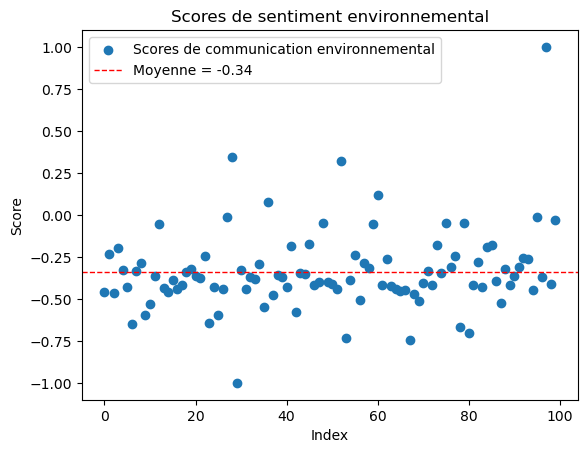

In [20]:
import matplotlib.pyplot as plt

# Données à tracer
x = range(100)
y = env_comm_score['environmental_sentiment_score']

# Tracer le nuage de points
plt.scatter(x, y, label='Scores de communication environnemental')

# Calculer et tracer la moyenne
mean_environmental_sentiment_score = env_comm_score['environmental_sentiment_score'].mean()
plt.axhline(mean_environmental_sentiment_score, color='red', linestyle='dashed', linewidth=1, label=f'Moyenne = {mean_environmental_sentiment_score:.2f}')

# Ajouter des titres et des labels
plt.title('Scores de sentiment environnemental')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()

# Afficher le graphique
plt.show()

## Score ESG

In [21]:
def visu_cours_esg(num_entreprise,):

    visu_esg_company = summarized_data['Company'].iloc[num_entreprise]
    visu_esg_data = summarized_data.drop(columns=['idEntreprise','Company','ISIN','environmental_sentiment_score']).iloc[num_entreprise]

    # Convertir les données en float et supprimer l'index 'idEntreprise'
    visu_esg_data = visu_esg_data.str.replace(',', '.').astype(float)

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_esg_data.index[1:], visu_esg_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=45, ticks=visu_esg_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du critère ESG de l'entreprise " + visu_esg_company
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Note ESG')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

# Manipulation des données

## Construction de la variable de communication environnemental dans le temps 

On a des données de score de communication environnemental pour une période (en Décembre 2023), en revanche, on a besoin de données de panels, ils nous faut donc le score de communication environnemental de janvier 2002 à Avril 2023. 

- Aléa + variation du critère ESG : On peut faire l'hypothèse que les agences de cotations font bien leur boulot. Ainsi, on analyse leur séries temporelles, dès lors que le score ESG attribué à une entreprise diminue, ou varie négativement en dessous d'un seuil, alors l'entreprise cherche à communiquer de manière verte.
-  Aléa pur : on peut considérer que le score environementale d'une entreprise est complètement aléatoire, on part du score environemental que l'on a, et on ajoute un epsilon à chaque période

#### Fonction pour visualiser le score de communication environemental dans le temps, une fois qu'on a ajouté l'aléa

In [23]:
def visu_cours_env_comm_score(num_entreprise, df):

    visu_company = df['Company'].iloc[num_entreprise]
    # Liste des colonnes à supprimer
    colonnes_a_supprimer = ['idEntreprise', 'Company', 'ISIN', 'env_sentiment_score_2023-12', 'environmental_sentiment_score']

    # Vérifie la présence de chaque colonne avant de la supprimer
    for colonne in colonnes_a_supprimer:
        if colonne in df.columns:
            df.drop(columns=[colonne], inplace=True)

    # Sélectionne la ligne spécifiée par num_entreprise
    visu_data = df.iloc[num_entreprise]

    # Créer le graphe
    plt.figure(figsize=(12, 6))
    plt.plot(visu_data.index[1:], visu_data.values[1:], marker='o', linestyle='-')

    # Ajuster l'affichage des ticks de l'axe des abscisses pour n'afficher qu'une date sur deux
    plt.xticks(rotation=90, ticks=visu_data.index[1::12])  # Affiche une date sur deux

    title = "Cours du score de communication environemental de l'entreprise " + visu_company
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Score de communication environemental')
    plt.grid(True)
    plt.tight_layout()  # Ajuste automatiquement le placement des labels pour éviter le chevauchement
    plt.show()

### Ajout aléa pur dans le score environnemental

#### Aléa = Uniforme sur [-0.2,0.2]

In [ ]:
# Liste des mois de janvier 2002 à avril 2023
months = pd.date_range(start='2002-01-01', end='2023-04-01', freq='MS')

# Liste pour stocker les nouvelles colonnes
new_columns = []

# Création des colonnes pour chaque mois avec de l'aléa
for month in months:
    col_name = f"env_sentiment_score_{month.strftime('%Y-%m')}"
    
    # Calcul du score avec ajout d'aléa
    new_col = env_comm_score['environmental_sentiment_score'] + np.random.uniform(-0.2, 0.2)
    
    # Ajuster les valeurs pour s'assurer qu'elles restent entre -1 et 1
    new_col = np.clip(new_col, -1, 1)
    
    new_col.rename(col_name, inplace=True)
    new_columns.append(new_col)

# Concaténation des nouvelles colonnes au DataFrame original
env_comm_score_extended_unif  = pd.concat([env_comm_score] + new_columns, axis=1)
env_comm_score_extended_unif.rename(columns={'environmental_sentiment_score': 'env_sentiment_score_2023-12'}, inplace=True)

# Affichage du DataFrame
env_comm_score_extended_unif.head()


In [ ]:
visu_cours_env_comm_score(1, env_comm_score_extended_unif)

#### Aléa = Normal (0 ; 0.5)

In [ ]:
# Liste pour stocker les nouvelles colonnes
new_columns = []

# Création des colonnes pour chaque mois avec de l'aléa
for month in months:
    col_name = f"env_sentiment_score_{month.strftime('%Y-%m')}"
    
    # Calcul du score avec ajout d'aléa
    new_col = env_comm_score['environmental_sentiment_score'] + np.random.normal(0, 0.5)
    
    # Ajuster les valeurs pour s'assurer qu'elles restent entre -1 et 1
    new_col = np.clip(new_col, -1, 1)
    
    new_col.rename(col_name, inplace=True)
    new_columns.append(new_col)

# Concaténation des nouvelles colonnes au DataFrame original
env_comm_score_extended_normal  = pd.concat([env_comm_score] + new_columns, axis=1)
env_comm_score_extended_normal.rename(columns={'environmental_sentiment_score': 'env_sentiment_score_2023-12'}, inplace=True)

# Affichage du DataFrame
env_comm_score_extended_normal.head()

In [ ]:
visu_cours_env_comm_score(1, env_comm_score_extended_normal)

### Aléa + critère ESG

On regarde les variations des score de réputation , en y ajoutant un bruit : Normale ( 0 , 0.01 )

In [24]:
# Sélectionner les colonnes sur lesquelles appliquer la fonction de variation
cols_to_change = PFL_E.columns.difference(['idEntreprise'])

# Remplacer les virgules par des points dans les colonnes sélectionnées
PFL_E[cols_to_change] = PFL_E[cols_to_change].replace(',', '.', regex=True)

# Convertir les colonnes sélectionnées en type numérique
PFL_E[cols_to_change] = PFL_E[cols_to_change].apply(pd.to_numeric)

# Calculer la variation mensuelle pour les colonnes sélectionnées
variation_mensuelle = PFL_E[cols_to_change].diff(axis=1) / PFL_E[cols_to_change].shift(axis=1)

# Remplacer les valeurs infinies par NaN
variation_mensuelle.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ajouter du bruit aux variations mensuelles
noise = np.random.normal(loc=0, scale=0.01, size=variation_mensuelle.shape)
var_bruit_PFL_E_data = variation_mensuelle + noise

# Concaténer la colonne 'idEntreprises' avec les variations calculées
var_bruit_PFL_E_data = pd.concat([PFL_E['idEntreprise'], var_bruit_PFL_E_data], axis=1)

# Afficher le résultat
var_bruit_PFL_E_data.head()


/tmp/ipykernel_10111/2746712013.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variation_mensuelle = PFL_E[cols_to_change].diff(axis=1) / PFL_E[cols_to_change].shift(axis=1)
/tmp/ipykernel_10111/2746712013.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variation_mensuelle = PFL_E[cols_to_change].diff(axis=1) / PFL_E[cols_to_change].shift(axis=1)


,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,1,NaN,0.002588,0.007035,-0.011140,0.013255,0.002765,-0.000180,-0.012082,-0.002845,...,0.016446,-0.003033,0.016986,-0.004029,0.003204,0.010942,0.012387,-0.044328,-0.000811,-0.003735
1,2,NaN,0.006291,0.023472,0.004971,-0.000897,-0.011938,-0.010158,0.000463,0.003267,...,-0.035442,0.010031,-0.072805,-0.011942,0.027557,0.021014,0.002188,-0.015889,0.009597,-0.008454
2,3,NaN,0.022432,0.004341,0.008589,-0.003622,-0.007484,0.010628,0.010492,-0.003245,...,0.008405,-0.005922,-0.012163,-0.011145,0.000819,-0.018046,0.001717,0.005653,0.002791,0.013512
3,4,NaN,-0.011493,0.006386,-0.000119,-0.008874,0.003315,-0.026686,0.017182,0.001454,...,0.010199,0.009574,-0.004214,0.001506,0.008373,0.002148,-0.002099,-0.004929,-0.020327,-0.005924
4,5,NaN,0.013142,0.001848,0.011355,-0.007861,-0.020088,0.022080,0.000483,0.007483,...,-0.005355,-0.002428,0.001679,0.007949,-0.013317,0.026968,0.001895,-0.019043,-0.017130,0.007967


Si on suppose qu'une entreprise communique de manière verte, et qu'il faut un certain nombre de mois (qu'on nottera h) pour que le score de réputation soit impacté par ces communications, on décale les colonnes de h 

In [25]:
h = 2

var_bruit_PFL_E_data = var_bruit_PFL_E_data[cols_to_change].shift(h, axis=1)

# Générer des valeurs aléatoires pour remplacer les NaN
random_values = np.random.rand(*var_bruit_PFL_E_data.shape)

# Remplacer les NaN par des valeurs aléatoires
var_bruit_PFL_E_data_filled = var_bruit_PFL_E_data.mask(var_bruit_PFL_E_data.isnull(), random_values)

# Afficher les premières lignes du DataFrame avec valeurs aléatoires
var_bruit_PFL_E_data_filled.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0.809429,0.017934,0.671685,0.002588,0.007035,-0.011140,0.013255,0.002765,-0.000180,-0.012082,...,0.003083,-0.009401,0.016446,-0.003033,0.016986,-0.004029,0.003204,0.010942,0.012387,-0.044328
1,0.542952,0.452008,0.804305,0.006291,0.023472,0.004971,-0.000897,-0.011938,-0.010158,0.000463,...,0.067515,0.007208,-0.035442,0.010031,-0.072805,-0.011942,0.027557,0.021014,0.002188,-0.015889
2,0.918005,0.272232,0.510469,0.022432,0.004341,0.008589,-0.003622,-0.007484,0.010628,0.010492,...,-0.012290,0.003683,0.008405,-0.005922,-0.012163,-0.011145,0.000819,-0.018046,0.001717,0.005653
3,0.902316,0.971517,0.794355,-0.011493,0.006386,-0.000119,-0.008874,0.003315,-0.026686,0.017182,...,-0.004986,0.102365,0.010199,0.009574,-0.004214,0.001506,0.008373,0.002148,-0.002099,-0.004929
4,0.153234,0.332004,0.336696,0.013142,0.001848,0.011355,-0.007861,-0.020088,0.022080,0.000483,...,0.025766,0.008755,-0.005355,-0.002428,0.001679,0.007949,-0.013317,0.026968,0.001895,-0.019043


In [61]:
# Sélectionner la valeur finale de 2023-04 pour chaque entreprise
valeur_finale_2023_04 = env_comm_score.loc[:, ['idEntreprise', 'environmental_sentiment_score']]

# Initialiser un DataFrame pour stocker les valeurs initiales et finales
valeurs_initiales_finales = valeur_finale_2023_04.copy()

# Liste pour stocker les nouvelles colonnes
new_columns = []

# Parcourir les colonnes de var_bruit_shift_esg_data_filled en sens inverse
for col in reversed(var_bruit_PFL_E_data_filled.columns):
    # Calculer les valeurs initiales à partir des valeurs finales et des taux de variation
    new_col = valeurs_initiales_finales['environmental_sentiment_score'] / (1 + var_bruit_PFL_E_data_filled[col])
    new_col.name = col  # Nommer la nouvelle colonne
    new_columns.insert(0,new_col)

# Concaténer les nouvelles colonnes au DataFrame existant
valeurs_initiales_finales = pd.concat([valeurs_initiales_finales] + new_columns, axis=1)
env_comm_score_extended_PFL_E = pd.merge(env_comm_score, valeurs_initiales_finales, on=['idEntreprise', 'environmental_sentiment_score'], how='inner')

# Afficher les valeurs initiales et finales
env_comm_score_extended_PFL_E

,idEntreprise,Company,ISIN,environmental_sentiment_score,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,General Electric Co,US3696041033,-0.458341,-0.253307,-0.450266,-0.274179,-0.457158,-0.455139,-0.463504,...,-0.456932,-0.462691,-0.450925,-0.459735,-0.450686,-0.460195,-0.456877,-0.453380,-0.452733,-0.479601
1,1909,Kajima Corp,JP3210200006,-0.232848,-0.150911,-0.160363,-0.129051,-0.231392,-0.227508,-0.231696,...,-0.218121,-0.231182,-0.241404,-0.230535,-0.251132,-0.235662,-0.226604,-0.228056,-0.232340,-0.236608
2,1951,Cigna Corp,US1255231003,-0.465797,-0.242855,-0.366125,-0.308379,-0.455577,-0.463784,-0.461830,...,-0.471593,-0.464088,-0.461914,-0.468572,-0.471532,-0.471046,-0.465415,-0.474357,-0.464999,-0.463178
3,1968,Aegon NV,NL0000303709,-0.195420,-0.102727,-0.099122,-0.108908,-0.197692,-0.194180,-0.195443,...,-0.196399,-0.177273,-0.193447,-0.193567,-0.196247,-0.195126,-0.193798,-0.195001,-0.195831,-0.196388
4,2035,SSE PLC,GB0007908733,-0.330052,-0.286197,-0.247786,-0.246916,-0.325771,-0.329443,-0.326346,...,-0.321761,-0.327187,-0.331829,-0.330856,-0.329499,-0.327449,-0.334507,-0.321385,-0.329428,-0.336459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19300,Zhuzhou Hongda Electronics Corp Ltd,CNE1000035L3,-0.013659,-0.007688,-0.007375,-0.009839,-0.013624,-0.013466,-0.013563,...,-0.013748,-0.013649,-0.013829,-0.013569,-0.013891,-0.013662,-0.013625,-0.013599,-0.013509,-0.013591
96,19419,Maten Petroleum AO,KZ1C00000868,-0.367093,-0.204332,-0.280879,-0.272291,-0.373447,-0.363334,-0.289203,...,-0.364714,-0.373506,-0.368444,-0.366000,-0.370163,-0.365377,-0.367809,-0.362880,-0.369164,-0.367198
97,19461,Nixu Oyj,FI0009008387,1.000000,0.600602,0.695683,0.615054,1.004278,1.008958,1.009648,...,0.987775,0.982965,0.983762,1.009293,0.984736,0.995860,0.990846,1.032697,0.989000,1.019208
98,19615,Guangzhou Great Power Energy and Technology Co...,CNE100001Z17,-0.409353,-0.293641,-0.258178,-0.277401,-0.408612,-0.407115,-0.404794,...,-0.409063,-0.407617,-0.408702,-0.406103,-0.404171,-0.411034,-0.411521,-0.405671,-0.405822,-0.410947


## Construction du panel

In [62]:
env_comm_score_extended_PFL_E = env_comm_score_extended_PFL_E.drop(columns=['Company','ISIN','environmental_sentiment_score'])
env_comm_score_extended_PFL_E

,idEntreprise,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,116,-0.253307,-0.450266,-0.274179,-0.457158,-0.455139,-0.463504,-0.452345,-0.457077,-0.458424,...,-0.456932,-0.462691,-0.450925,-0.459735,-0.450686,-0.460195,-0.456877,-0.453380,-0.452733,-0.479601
1,1909,-0.150911,-0.160363,-0.129051,-0.231392,-0.227508,-0.231696,-0.233057,-0.235661,-0.235237,...,-0.218121,-0.231182,-0.241404,-0.230535,-0.251132,-0.235662,-0.226604,-0.228056,-0.232340,-0.236608
2,1951,-0.242855,-0.366125,-0.308379,-0.455577,-0.463784,-0.461830,-0.467490,-0.469309,-0.460898,...,-0.471593,-0.464088,-0.461914,-0.468572,-0.471532,-0.471046,-0.465415,-0.474357,-0.464999,-0.463178
3,1968,-0.102727,-0.099122,-0.108908,-0.197692,-0.194180,-0.195443,-0.197170,-0.194774,-0.200778,...,-0.196399,-0.177273,-0.193447,-0.193567,-0.196247,-0.195126,-0.193798,-0.195001,-0.195831,-0.196388
4,2035,-0.286197,-0.247786,-0.246916,-0.325771,-0.329443,-0.326346,-0.332667,-0.336818,-0.322922,...,-0.321761,-0.327187,-0.331829,-0.330856,-0.329499,-0.327449,-0.334507,-0.321385,-0.329428,-0.336459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19300,-0.007688,-0.007375,-0.009839,-0.013624,-0.013466,-0.013563,-0.013448,-0.013504,-0.013702,...,-0.013748,-0.013649,-0.013829,-0.013569,-0.013891,-0.013662,-0.013625,-0.013599,-0.013509,-0.013591
96,19419,-0.204332,-0.280879,-0.272291,-0.373447,-0.363334,-0.289203,-0.361591,-0.368330,-0.367647,...,-0.364714,-0.373506,-0.368444,-0.366000,-0.370163,-0.365377,-0.367809,-0.362880,-0.369164,-0.367198
97,19461,0.600602,0.695683,0.615054,1.004278,1.008958,1.009648,0.993987,0.995808,0.987483,...,0.987775,0.982965,0.983762,1.009293,0.984736,0.995860,0.990846,1.032697,0.989000,1.019208
98,19615,-0.293641,-0.258178,-0.277401,-0.408612,-0.407115,-0.404794,-0.411545,-0.412201,-0.411541,...,-0.409063,-0.407617,-0.408702,-0.406103,-0.404171,-0.411034,-0.411521,-0.405671,-0.405822,-0.410947


In [60]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)

In [67]:
# Transposer la partie de la DataFrame
df1 = env_comm_score_extended_PFL_E.iloc[:, 1:].T

# Concaténer les colonnes transposées en une seule colonne
df_1 = pd.concat([df1[col] for col in df1.columns])
df_1 = df_1.to_frame()
df_1 = df_1.reset_index()
df_1.rename(columns={'index': 'Date'}, inplace=True)
df_1.rename(columns={0: 'score_comm'}, inplace=True)

df_1['Date'] = df_1['Date'].apply(str)

df_1.head()

,Date,score_comm
0,2009-01,-0.253307
1,2009-02,-0.450266
2,2009-03,-0.274179
3,2009-04,-0.457158
4,2009-05,-0.455139


In [70]:

# Créez un dictionnaire pour stocker les DataFrames
dfs = {
    'filtered_esg_data': filtered_esg_data,
    'filtered_PFL_E': filtered_PFL_E,
    'filtered_Diff_z_E': filtered_Diff_z_E,
    'filtered_CON_E': filtered_CON_E,
    'env_comm_score_extended_PFL_E':env_comm_score_extended_PFL_E
}

# Concaténez les DataFrames en une seule DataFrame
df = pd.concat(dfs.values())

# Créez une liste contenant les idEntreprises répétés pour chaque date
id_entreprises = []
for id_entreprise in df['idEntreprise'].unique():
    id_entreprises += [id_entreprise] * len(df.columns[1:])

# Répétez les dates pour chaque idEntreprise
dates = []
for _ in range(len(df['idEntreprise'].unique())):
    dates += df.columns[1:].tolist()

# Créez une DataFrame avec les idEntreprises et les dates répétées
new_df = pd.DataFrame({'idEntreprise': id_entreprises, 'Date': dates})
new_df['Date'] = new_df['Date'].apply(str)

new_df['idEntreprise'] = new_df['idEntreprise'].astype(object)

new_new_df = new_df.merge(df_1, left_on=['idEntreprise','Date'], right_on=['Date','score_comm'])

# Affichez la DataFrame résultante
new_new_df.head()

ValueError: You are trying to merge on object and float64 columns for key 'Date'. If you wish to proceed you should use pd.concat

In [ ]:
df_rep = PFL_E
df_con = CON_E

df_rep_melted = df_rep.melt(id_vars=['idEntreprise'], var_name='temps', value_name='Reputation')
df_con_melted = df_con.melt(id_vars=['idEntreprise'], var_name='temps', value_name='Controverse')

df_con_melted.head(5)

df_merged = pd.merge(df_rep, CON_E, on=['idEntreprise', 'temps'], how='outer')

print(df_merged.dtypes)

df_merged['temps'] = df_merged['temps'].astype(int)

df_panel = df_merged.set_index(['id_entreprise', 'temps'])


# Économétrie pure

On veut valider empiriquement l'équation suivante : 
$$\phi_{t}^{i} = \frac{1}{c_{\phi}^{i}}(P^{i}-A^{i}(E_{t}^{i}-\Psi_{t}^{i}))$$
Avec : 
- $\phi_{t}^{i}$: Flux mensuel de communication environnementale au mois $t$ pour l'entreprise $i$.
- $c_{t}^{i}$: Coût marginal de communication.
- $E_{t}^{i}$: Score environnemental au mois $t$ pour l'entreprise $i$.
- $\Psi_{t}^{i}$: Valeur environnementale fondamentale de l'entreprise $i$ au mois $t$.


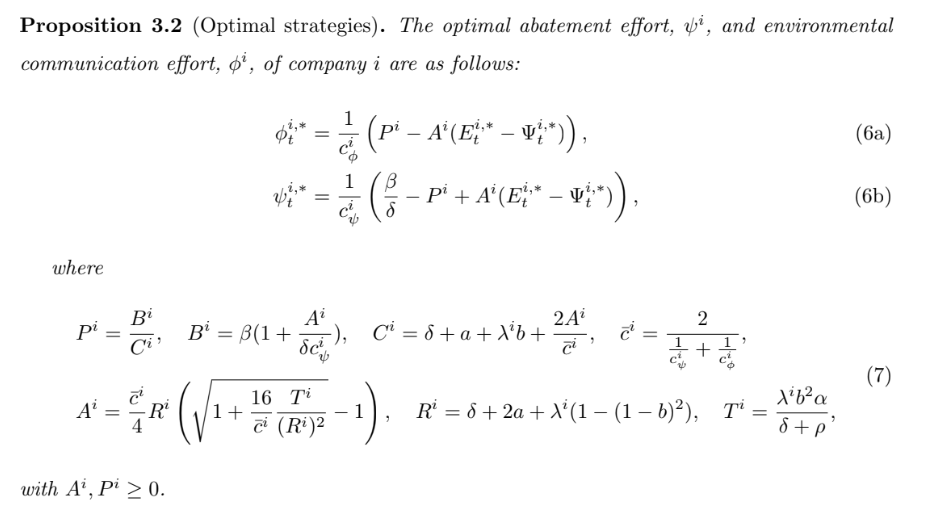

## 1st step

On cherche à construire un proxy $\hat{\phi}^{i}_{t}$ pour $\phi^{i}_{t}$. 

Nous construisons un score de communication environnementale, $\hat{\varepsilon}^{i}_{1,t}$, purifié de l'effet des controverses environnementales, défini comme les résidus de la régression Within de $Rep^{i}_{t}$ sur $Con^{i}_{t}$ avec des effets fixes dans le temps et pour l'entreprise, où $Con^{i}_{t}$ est instrumenté par $Con^{i}_{t-1}$ :
\begin{equation}
Rep^{i}_{t} = \alpha^{i}_{1,1} + \alpha_{1,2,t} + \beta_1 Con^{i,*}_{t} + \varepsilon^{i}_{1,t}
\end{equation}

où $Con^{i,*}_{t} = \hat{\beta}_2 Con^{i}_{t-1}$ est la prédiction de la régression suivante :
\begin{equation}
Con^{i}_{t} = \alpha^{i}_{2,1} + \alpha_{2,2,t} + \beta_2 Con^{i}_{t-1} + \varepsilon^{i}_{2,t}.
\end{equation}

--------------- TESTER PERTINENCE DE L'INSTRUMENT ----------------

Le test de pertinence de l'instrument $Con^{i}_{t}$ donne un $R^2$ de la régression de $Con^{i}_{t}$ sur $Con^{i}_{t-1}$ de 78,3\%. De plus, la condition d'exogénéité faible est satisfaite, assurant que les résidus de la régression 2SLS peuvent être utilisés pour construire un proxy du score de communication environnementale. Nous définissons alors un proxy du flux de communication environnementale, $\hat{\varphi}^{i}_{t}$, comme la première différence du score de communication environnementale :
\begin{equation}
\hat{\varphi}^{i}_{t} \equiv \hat{\varepsilon}^{i}_{1,t} - \hat{\varepsilon}^{i}_{1,t-1}.
\end{equation}

Ce proxy représente le flux de communication environnementale de l'entreprise i au mois t.

In [ ]:
from linearmodels.panel import PanelOLS, FirstDifferenceOLS
from linearmodels.iv import IV2SLS
from linearmodels.panel import PanelData

# Préparation des données
# Supposons que 'df' est notre DataFrame avec ['id_entreprise', 'temps', 'Rep', 'Con']
df = df.set_index(['id_entreprise', 'temps'])
df['Con_lag'] = df.groupby(level=0)['Con'].shift(1)

# Première étape: Régression de Con sur Con_lag avec effets fixes
# Pour les effets fixes dans linearmodels, on utilise directement PanelOLS
first_stage = PanelOLS.from_formula('Con ~ 1 + Con_lag + EntityEffects + TimeEffects', data=df)
res_first_stage = first_stage.fit()
df['Con_star'] = res_first_stage.fitted_values

# Deuxième étape: Régression 2SLS de Rep sur Con instrumenté par Con_star avec effets fixes
instrumented_variable = df['Con_star']
dependent_variable = df['Rep']
exogenous_variables = pd.DataFrame({'const': 1})  # Ajouter d'autres variables exogènes si nécessaire
exogenous_variables.index = df.index

second_stage = IV2SLS(dependent_variable, exogenous_variables, instrumented_variable, None).fit()
df['epsilon_hat'] = second_stage.resids

# Calcul du proxy du flux de communication environnementale
df['phi_hat'] = df.groupby(level=0)['epsilon_hat'].diff()


# Le reste du code

In [ ]:
def get_user_date(start_date, end_date):
    # Prompt the user for a date
    user_date_str = input(f"Enter a date between {start_date} and {end_date} (format YYYY-MM): ")
    
    # Convert user input to a pandas Timestamp
    try:
        user_date = pd.to_datetime(user_date_str, format='%Y-%m')
        start_date = pd.to_datetime(start_date, format='%Y-%m')
        end_date = pd.to_datetime(end_date, format='%Y-%m')

        # Check if the date is within the range
        if start_date <= user_date <= end_date:
            print(f"Selected date: {user_date.strftime('%Y-%m')}")
            return user_date
        else:
            print("Date is out of range. Please try again.")
            return None
    except ValueError:
        print("Invalid date format. Please try again.")
        return None

# Example usage
get_user_date("2002-01", "2023-04")


In [ ]:
# On laisse l'utilisateur choisir une date
date_debut="2002-01"
date_fin="2023-04"
t = get_user_date(date_debut,date_fin)
t = pd.to_datetime(t, format='%Y-%m')
t_minus_1 = (t - pd.DateOffset(months=1)).strftime('%Y-%m')
print(t_minus_1)

# On recupère les scores des etp aux dates t et t-1
col_index = esg_data.columns.get_loc(t)
esge_t = esg_data.iloc[:, col_index]
col_index = esg_data.columns.get_loc(t_minus_1)
esge_t_minus_1 = esg_data.iloc[:, col_index]

In [ ]:
data = {
    'env_comm_score': env_comm_score, 
    'esge': esge_t
    'esge_past': esge_t_minus_1
    'esge_peer': np.random.uniform(0, 100, 100)  # 100 peer environmental scores in the same sector
}

df = pd.DataFrame(data)

# Show the first few rows of the DataFrame
print(df.head())

# Define your variables
dependent = df['env_comm_score']
independent = df[['const']]  # Assuming you've added a constant term to your DataFrame
instrument = df['esge_past']  # Instrumenting esge with its past value
endogenous = df['esge']  # The variable you believe is endogenous

# Setup and run the 2SLS regression
model = IV2SLS(dependent, independent, endogenous, instrument).fit()

# Print model summary
print(model.summary)

# To instrument 'esge' with both its past value and peer scores, you might do:
instrument2 = df[['esge_past', 'esge_peer']]
model2 = IV2SLS(dependent, independent, endogenous, instrument2).fit()
print(model2.summary)
